In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors

# Cellular automata updating function

As learned from the [*Modeling Complex System*](https://github.com/jlobatop/modeling-complex-systems) course I took, the cellular automata has some characteristics that must be defined before going on. 

* Updates will be done syncronously
* Both types of neighborhoods will be tried when selecting the neighbors: von Nuemann and Moore
* Boundaries willl be absorbing (i.e., walls)

The function <tt>cellUpdate</tt> has the rules coded and it will update the cells.

In [2]:
def cellUpdate(target, neighbors, pD = 0.99, pB = 0.99):
    '''Function to update the cells of the CA 
    
    INPUTS:
       target: target cell value
       neighbors: numpy.ndarray with the corresponding neighbors
       pD: probability of the fire of dying out (default = 0.99)
       pB: burning probability of the fire (default = 0.99)
       
    OUTPUTS:
       newState: state of the target cell after update'''
    
    # if the cell is empty
    if target == 0:
        # it will remain empty
        newState = 0
        
    # if the cell is fire
    if target == 1:
        # it may go to empty
        if np.random.rand() < pD:
            newState = 0
        # or it may stay as fire
        else:
            newState = 1
            
    # if the cell is fuel
    if target == 2:
        # neighbor comparison, if there are any 0 or 1
        if np.logical_or(neighbors == 0, neighbors == 1).sum() != 0:
            # it may get in fire
            if np.random.rand() < pB:
                newState = 1
            # or it may stay as fuel 
            else:
                newState = 2
        # if there are no 'fire' nor 'empty', it will remain as fuel
        else:
            newState = 2
            
    return newState

# Cellular automata initialization
The initialization will be done by importing different binary files with arrays of 0 and 1, multiplying it by 2 to have fuel (<tt>2</tt>) and empty (<tt>0</tt>) cells. The function must also ensure that the array is squared (so it can be easily plotted).

In [3]:
def initialization(filename, route):
    '''Function to update the cells of the CA 
    
    INPUTS:
        filename: name of the file with initialState as squared
                  numpy.ndarray with 0 and 1
        route: folder directory of the location

    OUTPUTS:
       initialState: corrected file to have only 0 and 2'''
    
    # load the textfile with the desired name
    initialState = np.loadtxt(route+filename)
    
    # check that the array is squared
    if initialState.shape[0] != initialState.shape[1]:
        # if it is not squared, raise an error
        raise ValueError('Array has not a squared shape')
    # otherwise, return the corrected fuel-empty array
    return 2*initialState

# Cellular automata loop
In this case, the stop condition will be when there are nothing but 0's in the state matrix. So a <tt>while</tt> loop will be used.

In [4]:
# create a list to store the states along time
states = []

# select the type of neighborhood ('moore' or 'vonNeumann')
neighborhoodType = 'vonNeumann'

# load the example 'tubular' file
filename = 'doubleAnchor'
states.append(initialization(filename, './examples/'))

# preallocate space for the intermediate state
intState = np.zeros((states[0].shape))

# time counter
t = 0

# loop until there are only zeros in the state
while np.sum(states[t] == 0) != states[t].shape[0]**2:
    
    # loop over all the cells of the array
    # i direction is the tangential direction
    for i in range(states[t].shape[0]):
        
        # j direction is the ratial way
        for j in range(states[t].shape[1]):

            # get te neighbors for the two possible types of neighborhood
            
            # abs((i+1) % states[t].shape[0]) is there for the case where
            # i = states[t].shape[0]-1 which will return error for invalid index 
            
            # More neighborhood type selection
            if neighborhoodType == 'moore':
                # if the index is zero, it will be the center    
                if j == 0:
                    neighbors = np.array([states[t][i-1,j],states[t][i-1,j+1],
                                          states[t][i,j+1],
                                          states[t][abs((i+1) % states[t].shape[0]),j],
                                          states[t][abs((i+1) % states[t].shape[0]),j+1]])
                # if the index is maximum, it will be the rocket wall
                elif j == states[t].shape[1]-1:
                    neighbors = np.array([states[t][i-1,j-1],states[t][i-1,j],
                                          states[t][i,j-1],
                                          states[t][abs((i+1) % states[t].shape[0]),j-1],
                                          states[t][abs((i+1) % states[t].shape[0]),j]])
                # for the 'i' direction the boundaries are connected
                # so all the other cases will follow the same procedure
                else:
                    neighbors = np.array([states[t][i-1,j-1],states[t][i-1,j],states[t][i-1,j+1],
                                          states[t][i,j-1],states[t][i,j+1],
                                          states[t][abs((i+1) % states[t].shape[0]),j-1],
                                          states[t][abs((i+1) % states[t].shape[0]),j],
                                          states[t][abs((i+1) % states[t].shape[0]),j+1]])    

            # von Neumann neighborhood type selection
            else:
                # if the index is zero, it will be the center    
                if j == 0:
                    neighbors = np.array([states[t][i-1,j],
                                          states[t][abs((i+1) % states[t].shape[0]),j],
                                          states[t][i,j+1]])
                # if the index is maximum, it will be the rocket wall
                elif j == states[t].shape[1]-1:
                    neighbors = np.array([states[t][i-1,j],
                                          states[t][abs((i+1) % states[t].shape[0]),j],
                                          states[t][i,j-1]])
                # for the 'i' direction the boundaries are connected (no constraints)
                # so all the other cases will follow the same procedure
                else:
                    neighbors = np.array([states[t][i-1,j],
                                          states[t][abs((i+1) % states[t].shape[0]),j],
                                          states[t][i,j-1],states[t][i,j+1]])
            
            # compute the new value of the target cell
            intState[i,j] = cellUpdate(states[t][i,j],neighbors)
            
    # once the whole array has been updatedd, append it to the list
    states.append(np.copy(intState))
        
    # increase the time counter
    t += 1

# Normalize thrust computation
To have the thrust profile curve, this will be computed with:
$$
T = I_{sp} g_0 \dot{m}
$$
st roberts law definition and theory

older approaches
<tt>
    # Ttilda = [(states[t]==1).sum() for t in range(len(states))]
</tt>

<tt>
    # Ttilda = [(2*np.pi*r/N*states[t])[states[t]==1].sum() for t in range(len(states))]
</tt>

...

(complete with drawings)

In [5]:
def burningLength(state):
    '''Calculation of the burning (area) length of each state
    
    INPUTS:
        state: numpy.ndarray with the states (0,1,2) 
        
    OUTPUTS:
       burningLength: true burning length of the state'''
    
    # initial state have a burning length of zero
    if len(np.unique(state)) == 2:
        return 0
    
    # when there is burning length
    else:
        # get the number of divisions of the grid
        N = state.shape[0]
        # create the inter-cell radius 
        Rinter = np.linspace(0,1,N+1)
        # copy the state matrix
        mat = np.copy(state)
        # replace the fuel cells with 'fire' cells 
        np.place(mat, mat==2, 1)
        # radial direction variation
        radDir = (np.abs(mat[:,0:-1]-mat[:,1:])*2*np.pi/N*Rinter[1:-1]).sum()
        # tangential direction variation
        tanDir = (np.abs(mat-np.vstack((mat[1:,:],mat[0,:])))/N).sum()
        # return the sum of both fire fronts
        return tanDir + radDir

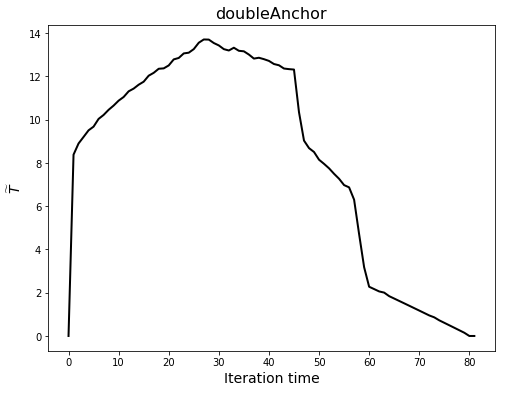

In [6]:
# compute the normalized thrust
Ttilda = np.array([burningLength(states[i]) for i in range(len(states))])

# plot the thrust profile
fig, ax = plt.subplots(1, figsize=(8,6))
ax.set_xlabel('Iteration time', fontsize=14)
ax.set_ylabel('$\widetilde{T}$', fontsize=14)
ax.set_title(filename, fontsize=16)
ax.plot(Ttilda, 'k', lw=2)